# ***VOLATILITY CLUSTERING MODEL :***
---

### Data Collection & Objective :

- This volatility clustering model deals with the secondary data taken from Yahoo Finance, and the data is on the National Stock Exchange or Nifty 50 which involves the Random Walk because it is a stock market data.
- The data is considered from September 2007 to till date, and it is fundamental to mention that the analysis will be keeping on updated when everytime this notebook will be run. Therefore, this work is a part of live project which is slef depicted for analysis purposes.
- The analysis first of all shows a normal summary of the time series using a line plot, and then it deals with the testing and return claculation. Finally, the analysis forecast the volatility using econometric models of linear time series like ARCH & GARCH.  
- The objective of the analysis is to show the risk pattern or behaviour of the stock market when the stock prices are skyrocketing. 

---

# **1. Importing the Necessary Libraries :**
---

**Libraries to be used :**

- pandas
- numpy
- matplotLib
- arch
- statsmodels.api
- statsmodels.compat
- statsmodels.graphics
- yfinance
- seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arch
import statsmodels.api as sm
from statsmodels.compat import lzip
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf

# **2. NSE Historical Data : (NIFTY 50)**
---

### 2.1. Showing the Dataset :

In [2]:
nse = yf.download("^NSEI")
print(nse)

[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...                  ...           ...           ...           ...   
2024-02-12  21800.800781  21831.699219  21574.750000  21616.050781   
2024-02-13  21664.300781  21766.800781  21543.349609  21743.250000   
2024-02-14  21578.150391  21870.849609  21530.199219  21840.050781   
2024-02-15  21906.550781  21953.849609  21794.800781  21910.750000   
2024-02-16  21578.199219  22068.650391  21968.949219  22040.699219   

               Adj C

In [3]:
nse["Adj_Close"] = nse["Adj Close"]
df = nse[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']].copy()
print(df)

                    Open          High           Low         Close  \
Date                                                                 
2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...                  ...           ...           ...           ...   
2024-02-12  21800.800781  21831.699219  21574.750000  21616.050781   
2024-02-13  21664.300781  21766.800781  21543.349609  21743.250000   
2024-02-14  21578.150391  21870.849609  21530.199219  21840.050781   
2024-02-15  21906.550781  21953.849609  21794.800781  21910.750000   
2024-02-16  21578.199219  22068.650391  21968.949219  22040.699219   

               Adj_Close  Volume  
Date                              
2007-09-17   4494.6

### 2.2. Summary of the Timeseries at a Glance :

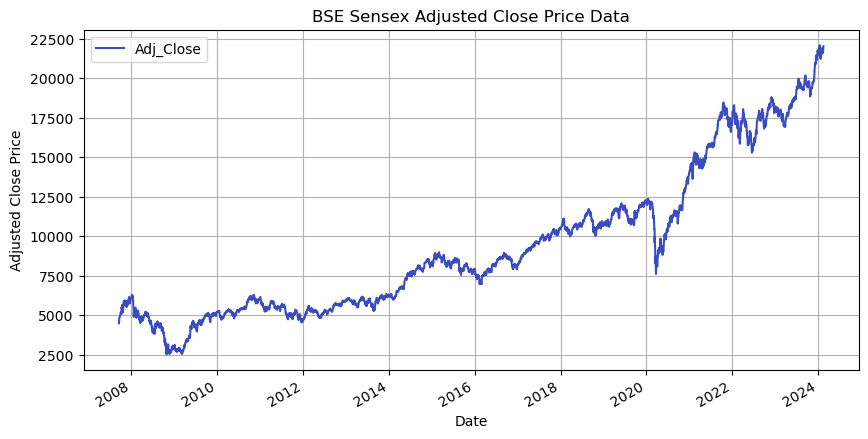

In [4]:
#df["Adj_Close"] = np.log10(df["Adj_Close"])
df["Adj_Close"].plot(figsize = (10,5), fontsize = 10, colormap = 'coolwarm',title = "BSE Sensex Adjusted Close Price Data", xlabel = "Date", ylabel = "Adjusted Close Price")
plt.grid()
plt.legend();

---

- **Observation from 2.2 :**

1. The NSE data has 6 columns and the most important one is the Adjusted Close price for the analysis. Adjusted Close price involves the price which is adjusted after several actions taken by the companies, for example; divident payments, stock splits, Merger or Acquisitions etc. Therefore, Adjusted Close price is justified for further consideration of the return calculation.
2. The Adjusted Close price behaves like a typical stock price data. It is important to note here that during 2020-2021 the stock price fell significantly due to COVID - 19 pandemic.
3. Fluctuations and trend both can be noticed in the dataset, which signifies the stochastic and deterministic trends in the stock market. The presence of the stochastic trend implies the presence of Random Walk in the market.

# **3. Checking for unit root (Random Walk) using Augmented D-F Test and Return Calculation :**
---

### 3.1. ADF Test :

In [5]:
ADF = sm.tsa.stattools.adfuller(df['Adj_Close'])
print("p-Value of ADF Test = {}".format(round(ADF[1])))

p-Value of ADF Test = 1


---

- **Observation from 3.1 :**

The test result shows that the unit root is present in the presence of the past behaviour. Therefore, this data shows the Random Walk pattern.

### 3.2. Detrending & Return Calculation:

In [6]:
df['Return'] = df['Adj_Close'].pct_change()
print(df.Return)

Date
2007-09-17         NaN
2007-09-18    0.011469
2007-09-19    0.040946
2007-09-20    0.003212
2007-09-21    0.018957
                ...   
2024-02-12   -0.007641
2024-02-13    0.005884
2024-02-14    0.004452
2024-02-15    0.003237
2024-02-16    0.005931
Name: Return, Length: 4025, dtype: float64


**Note : It is extremely important that, in order to forecast the risk, the null values from the Return data must be removed.**

In [7]:
df.dropna(inplace = True)
print(df.Return)

Date
2007-09-18    0.011469
2007-09-19    0.040946
2007-09-20    0.003212
2007-09-21    0.018957
2007-09-24    0.019566
                ...   
2024-02-12   -0.007641
2024-02-13    0.005884
2024-02-14    0.004452
2024-02-15    0.003237
2024-02-16    0.005931
Name: Return, Length: 4024, dtype: float64


### 3.3. Plotting the Daily Return :

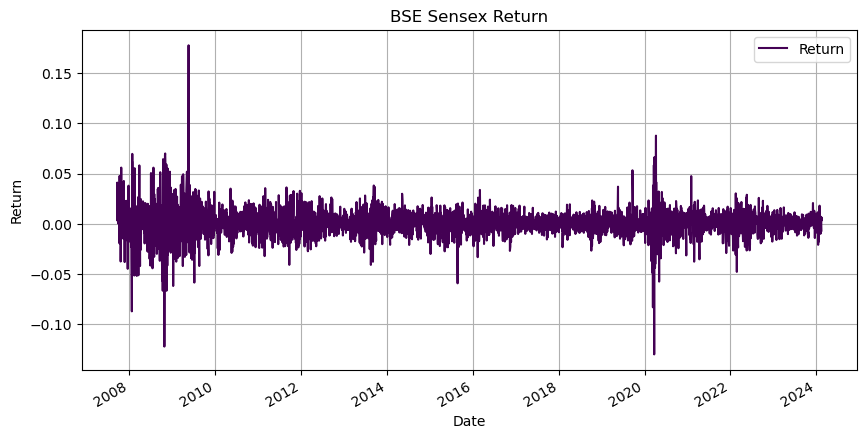

In [8]:
df["Return"].plot(figsize = (10,5), fontsize = 10, colormap = 'viridis',title = "BSE Sensex Return", xlabel = "Date", ylabel = "Return")
plt.grid()
plt.legend();

In [9]:
print("The mean of daily return : {}".format(round(df['Return'].mean(),2)))

The mean of daily return : 0.0


---

- **Observation from 3.3 :**

1. From the Return graph, it is clearly evidenced that there is no trend, that is, it is free from random error components.
2. There are lots of fluctuations in the Return series which are clustered and not uniform in nature.
3. Since the fluctuations are not uniform in nature, the variance of this series is not homogeneous, it is heteroscedastic and time dependent.
4. Therefore, the return is highly volatile.

**Next, in order to understand the risk behaviour, the ACF plots of Return and Return Squared can be considered.**

### 3.4. Plotting ACF :

#### 3.4.1. Plotting ACF of Return :

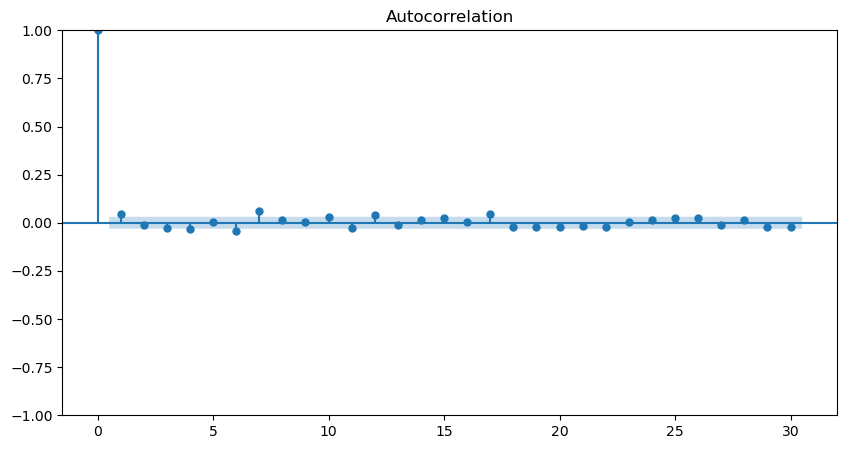

In [10]:
plt.figure(figsize = (10,5))
plot_acf(df.Return, lags = 30, ax=plt.gca())
plt.show()

#### 3.4.2. Plotting ACF of Return Squared :

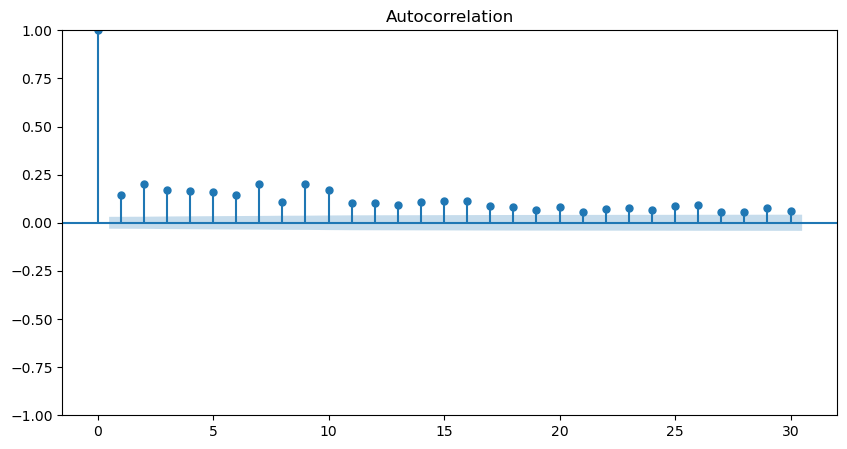

In [11]:
df['Return_Squared'] = np.square(df['Return'])
plt.figure(figsize = (10,5))
plot_acf(df.Return_Squared, lags = 30, ax=plt.gca())
plt.show()

---

- **Observation from 3.4.1 and 3.4.2 :**

1. The ACF of Return series has more or less a systematic pattern, but the ACF of Return Squared series, the systematic pattern can be evidenced more.
2. Therefore, it can be inferred that the original return series has an approch towards the stationarity, but the varience is is time dependent and it indicates an ARCH effect in the return series. In a conclusion, variance in the Return series involves risk or volatily, and therefore, the test for ARCH & GARCH effect must be considered.

# **4. Checking for ARCH or GARCH Effect :**
---

In [12]:
garch_model = arch.arch_model(df.Return, vol = 'GARCH', p = 1, q = 1, rescale = False)

In [13]:
garch_fit = garch_model.fit(disp = 'off', show_warning = False)

In [14]:
residual = garch_fit.resid
sq_residual = np.square(residual)

In [15]:
conditional_het_test = sm.stats.diagnostic.het_arch(sq_residual)

In [16]:
print("LM Statistic : {}".format(conditional_het_test[0]))
print("p-Value : {}".format(conditional_het_test[1]))
print("F Statistic : {}".format(conditional_het_test[2]))
print("p-Value : {}".format(conditional_het_test[3]))

LM Statistic : 44.43393961941865
p-Value : 2.7504185008584337e-06
F Statistic : 4.480818749228228
p-Value : 2.5634882931492365e-06


---

- **Observation of the Maximum Likelihood Test :**

The null and the alternative hypothesis considered for this test are :

Ho : No ARCH Effects

H1 : ARCH Disturbances

Clearly from the test statistic, both the p-values are less than 0.05. Therefore, the null hypothesis needs to be rejected and it affirms that there is a presence of ARCH effect in the series. Therefore, the volatility clustering model can be applied here.

# **5. Fitting ARCH and GARCH Models :**
---

**Note : With respect to several lang lengths the model can be fitted. The best fitted model can be addressed based on the AIC, BIC and p-Values. As long as the p-Value is less than 0.05, that is at 5% level of significance, the model can be considered. But, the best model will depend on the less amount of information loss which is considered based on the AIC and BIC. The less the AIC and BIC, the model is good. On the basis of this, the fitting of ARCH and GARCH is considered.** 

### 5.1. Fitting ARCH (1) :

In [17]:
arch_1 = arch.arch_model(df['Return'], vol = 'ARCH', p = 1, rescale = False)
output = arch_1.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12002.0
Distribution:                  Normal   AIC:                          -23998.0
Method:            Maximum Likelihood   BIC:                          -23979.1
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.1778e-04  2.065e-04      2.508  1.214e-02 [1.

### 5.2. Fitting ARCH (2) :

In [18]:
arch_2 = arch.arch_model(df['Return'], vol = 'ARCH', p = 2, rescale = False)
output = arch_2.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12208.4
Distribution:                  Normal   AIC:                          -24408.7
Method:            Maximum Likelihood   BIC:                          -24383.5
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.1479e-04  1.759e-04      4.632  3.616e-06 [4.

### 5.3. Fitting ARCH (3) :

In [19]:
arch_3 = arch.arch_model(df['Return'], vol = 'ARCH', p = 3, rescale = False)
output = arch_3.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12275.9
Distribution:                  Normal   AIC:                          -24541.9
Method:            Maximum Likelihood   BIC:                          -24510.4
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.1085e-04  1.743e-04      4.653  3.270e-06 [4.

### 5.4. Fitting ARCH (4) :

In [20]:
arch_4 = arch.arch_model(df['Return'], vol = 'ARCH', p = 4, rescale = False)
output = arch_4.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12400.3
Distribution:                  Normal   AIC:                          -24788.6
Method:            Maximum Likelihood   BIC:                          -24750.8
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.7361e-04  1.639e-04      5.329  9.896e-08 [5.

### 5.5. Fitting ARCH (5) :

In [21]:
arch_5 = arch.arch_model(df['Return'], vol = 'ARCH', p = 5, rescale = False)
output = arch_5.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12423.1
Distribution:                  Normal   AIC:                          -24832.2
Method:            Maximum Likelihood   BIC:                          -24788.1
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.6029e-04  1.580e-04      5.446  5.158e-08 [5.

### 5.6. Fitting ARCH (6) :

In [22]:
arch_6 = arch.arch_model(df['Return'], vol = 'ARCH', p = 6, rescale = False)
output = arch_6.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12457.1
Distribution:                  Normal   AIC:                          -24898.2
Method:            Maximum Likelihood   BIC:                          -24847.8
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.0418e-04  1.590e-04      5.686  1.299e-08 [5.

### 5.7. Fitting ARCH (7) :

In [23]:
arch_7 = arch.arch_model(df['Return'], vol = 'ARCH', p = 7, rescale = False)
output = arch_7.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12490.4
Distribution:                  Normal   AIC:                          -24962.8
Method:            Maximum Likelihood   BIC:                          -24906.1
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:43   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.1719e-04  1.566e-04      5.219  1.803e-07 [5.

### 5.8. Fitting ARCH (8) :

In [24]:
arch_8 = arch.arch_model(df['Return'], vol = 'ARCH', p = 8, rescale = False)
output = arch_8.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12504.3
Distribution:                  Normal   AIC:                          -24988.6
Method:            Maximum Likelihood   BIC:                          -24925.6
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:44   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.2026e-04  1.506e-04      5.447  5.128e-08 [5.

### 5.9. Fitting ARCH (9) :

In [25]:
arch_9 = arch.arch_model(df['Return'], vol = 'ARCH', p = 9, rescale = False)
output = arch_9.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12517.4
Distribution:                  Normal   AIC:                          -25012.8
Method:            Maximum Likelihood   BIC:                          -24943.5
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:44   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.2146e-04  1.508e-04      5.447  5.132e-08 [5.

### 5.10. Fitting ARCH (10) :

In [26]:
arch_10 = arch.arch_model(df['Return'], vol = 'ARCH', p = 10, rescale = False)
output = arch_10.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12530.0
Distribution:                  Normal   AIC:                          -25035.9
Method:            Maximum Likelihood   BIC:                          -24960.3
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:44   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8004e-04  1.511e-04      5.164  2.422e-07 [4.

### 5.11. Fitting ARCH (11) : 

In [27]:
arch_11 = arch.arch_model(df['Return'], vol = 'ARCH', p = 11, rescale = False)
output = arch_11.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12528.8
Distribution:                  Normal   AIC:                          -25031.5
Method:            Maximum Likelihood   BIC:                          -24949.6
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:44   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.9576e-04  1.496e-04      5.321  1.032e-07 [5.

### 5.12. Recalulating the Return for GARCH :

In [28]:
df['Return'] = df['Return']*100
df

,Open,High,Low,Close,Adj_Close,Volume,Return,Return_Squared
Date,,,,,,,,
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,1.146926,0.000132
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,4.094626,0.001677
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,0.321187,0.000010
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,1.895715,0.000359
2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,4932.200195,0,1.956577,0.000383
...,...,...,...,...,...,...,...,...
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,21616.050781,287400,-0.764142,0.000058
2024-02-13,21664.300781,21766.800781,21543.349609,21743.250000,21743.250000,365800,0.588448,0.000035
2024-02-14,21578.150391,21870.849609,21530.199219,21840.050781,21840.050781,359100,0.445199,0.000020


### 5.13. GARCH (1,1) :

In [29]:
garch_1_1 = arch.arch_model(df['Return'],vol = 'GARCH', p = 1,q = 1)
output = garch_1_1.fit(disp = 'off', show_warning = False)
print(output.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5962.68
Distribution:                  Normal   AIC:                           11933.4
Method:            Maximum Likelihood   BIC:                           11958.6
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:44   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0783  1.490e-02      5.259  1.447e-07 [4.915e-0

### 5.14. GARCH (2,2) :

In [30]:
garch_2_2 = arch.arch_model(df['Return'],vol = 'GARCH', p = 2,q = 2)
output = garch_2_2.fit(disp = 'off', show_warning = False)
print(output.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5960.13
Distribution:                  Normal   AIC:                           11932.3
Method:            Maximum Likelihood   BIC:                           11970.1
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:45   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0787  1.492e-02      5.275  1.326e-07 [4.947e-0

---

- **Observation from Section 5 :**

1. ARCH(10) or GARCH(1,1) can be the best fit model based on the information considered from AIC and BIC criteria.
2. For other models and GARCH(2,2), either the information loss is at the max or some parameters are not significant at the 5% level of significance.
3. Now on the basis of the criteria, one should choose which model can be used among ARCH(10) and GARCH(1,1). But, it is widely used that if the AIC and BIC are of opposite signs in case of ARCH and GARCH, the model with the less information loss should be considered. In this case, the ARCH(10) seems feasible. Therefore, the volatility will be forecasted based on the ARCH(10) model.

# **6. Volatility Forecasting with ARCH (10) :** 

In [31]:
df['Return'] = df['Return']/100
print(df['Return'])

Date
2007-09-18    0.011469
2007-09-19    0.040946
2007-09-20    0.003212
2007-09-21    0.018957
2007-09-24    0.019566
                ...   
2024-02-12   -0.007641
2024-02-13    0.005884
2024-02-14    0.004452
2024-02-15    0.003237
2024-02-16    0.005931
Name: Return, Length: 4024, dtype: float64


In [32]:
arch_10 = arch.arch_model(df['Return'], vol = 'ARCH', p = 10, rescale = False)
output = arch_10.fit(disp = 'off', show_warning = False)
print(output.summary()) 

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                12530.0
Distribution:                  Normal   AIC:                          -25035.9
Method:            Maximum Likelihood   BIC:                          -24960.3
                                        No. Observations:                 4024
Date:                Fri, Feb 16 2024   Df Residuals:                     4023
Time:                        21:09:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8004e-04  1.511e-04      5.164  2.422e-07 [4.

In [33]:
forecast_horizon = 10  
forecast_result = output.forecast(horizon=forecast_horizon)
forecasted_volatility = forecast_result.variance.values[-1]
print("Forecasted volatility for the next", forecast_horizon, "periods:")
for i, value in enumerate(forecasted_volatility):
    print(f"Period {i+1}: {value:.8f}")

Forecasted volatility for the next 10 periods:
Period 1: 0.00005455
Period 2: 0.00005744
Period 3: 0.00005877
Period 4: 0.00006372
Period 5: 0.00005982
Period 6: 0.00006449
Period 7: 0.00006394
Period 8: 0.00006716
Period 9: 0.00007173
Period 10: 0.00007731


### 6.1. Plotting the Forecasted Volatility :

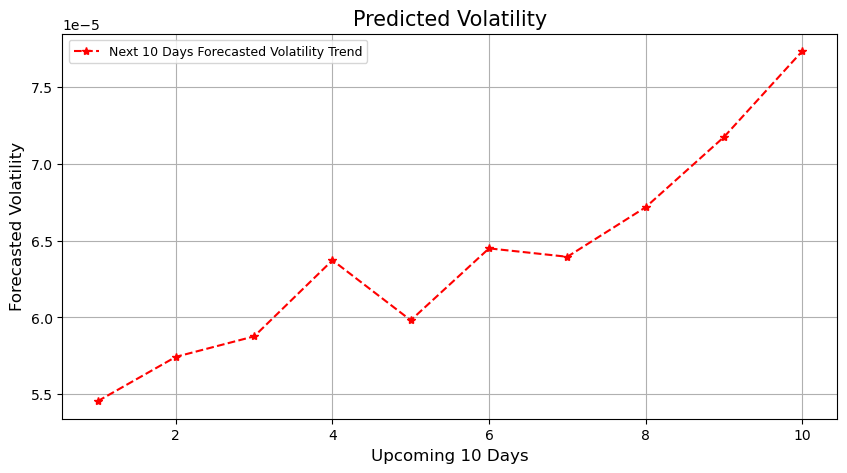

In [34]:
time_frame = range(1, forecast_horizon + 1)
plt.figure(figsize = (10,5))
plt.plot(time_frame, forecasted_volatility,'--', label = "Next 10 Days Forecasted Volatility Trend", marker = '*', color = 'r')
plt.title("Predicted Volatility", fontsize = 15)
plt.xlabel("Upcoming 10 Days", fontsize = 12)
plt.ylabel("Forecasted Volatility", fontsize = 12)
plt.legend(fontsize = 9)
plt.grid();

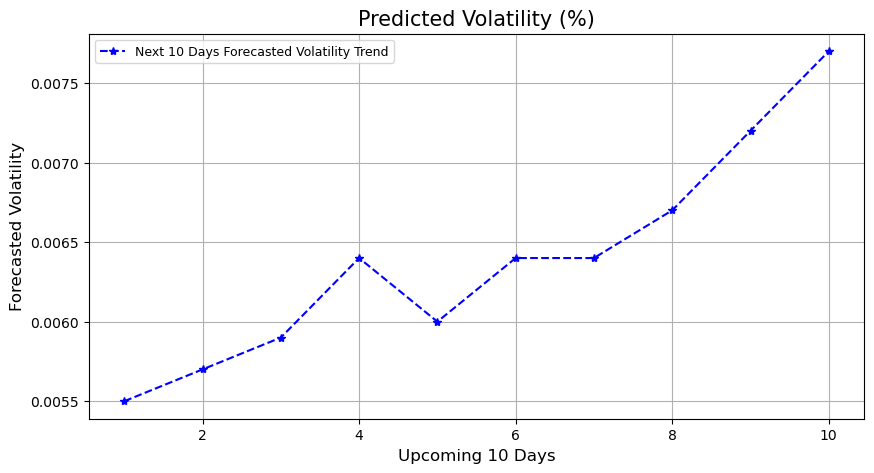

In [35]:
plt.figure(figsize = (10,5))
plt.plot(time_frame, (forecasted_volatility*100).round(4),'--', label = "Next 10 Days Forecasted Volatility Trend", marker = '*', color = 'b')
plt.title("Predicted Volatility (%)", fontsize = 15)
plt.xlabel("Upcoming 10 Days", fontsize = 12)
plt.ylabel("Forecasted Volatility", fontsize = 12)
plt.legend(fontsize = 9)
plt.grid();

---

**Observation from 6.1 :**

1. As the stock price increases, the volatility in the market steadily increases.
2. Mean Return is low in the market, but it is volatile.
3. There is a presence of leverage effect in the market which 0.085. The effect is statistically significant and not so strong in the market.